#Travel Package Purchase Prediction

A tourism company named "Visit with us" is looking to offer a new Wellness Tourism Package. The Policy Maker of the company would like to establish a viable business model to expand their customer base.

Visit with us wants help to create a central business concept better understand their current customer base their existing tourism package sales.

The company currently offers 5 different tourism packages - Basic, Standard, Deluxe, Super Deluxe, King. Sales data from last year shows that 18% of customers purchased a tourism package.

Visit with us has said that their marketing budget ran quite high and that customers were contacted at random. 

They are trying to expand their customer base by offering a new "Wellness Tourism" package. They would like to use their existing sales data in order to better target customers in order to increase sales while making more efficient use of their marketing budget.

The Wellness Tourism package is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

##My Objective

As a data scient for Visit with us I am going to create a model using the existing customer sales data in order to better predict which customers are more likely to purchase the new Wellness Tourism package. By better identifying the customers most likely to purchase the new package I will be able to help Visit with us to use their marketing budget more efficiently helping to reduce costs while also increasing sales.

##Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, - facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

###Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

In [3]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
import openpyxl
from pathlib import Path

#Import Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tour = pd.read_excel('/content/drive/MyDrive/Python Course/Tourism_Data.xlsx')

In [7]:
# Make a copy of the data
data = tour.copy()

In [8]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000.0,1.0,41.0,Self Enquiry,3.0,6.0,Salaried,Female,3.0,3.0,Deluxe,3.0,Single,1.0,1.0,2.0,1.0,0.0,Manager,20993.0
1,200001.0,0.0,49.0,Company Invited,1.0,14.0,Salaried,Male,3.0,4.0,Deluxe,4.0,Divorced,2.0,0.0,3.0,1.0,2.0,Manager,20130.0
2,200002.0,1.0,37.0,Self Enquiry,1.0,8.0,Free Lancer,Male,3.0,4.0,Basic,3.0,Single,7.0,1.0,3.0,0.0,0.0,Executive,17090.0
3,200003.0,0.0,33.0,Company Invited,1.0,9.0,Salaried,Female,2.0,3.0,Basic,3.0,Divorced,2.0,1.0,5.0,1.0,1.0,Executive,17909.0
4,200004.0,0.0,NaN,Self Enquiry,1.0,8.0,Small Business,Male,2.0,3.0,Basic,4.0,Divorced,1.0,0.0,5.0,1.0,0.0,Executive,18468.0


- Data imported succesfully

#Data Overview

In [9]:
data.shape

(4888, 20)

- There are 4888 rows and 20 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   float64
 1   ProdTaken                 4888 non-null   float64
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   float64
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   float64
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- There are 6 object type columns and 14 float types
- Age, TypeofContact, DurationofPitch, NumberofFollowups, PreferredPropertyStar, NumberofTrips, NumberofChildrenVisiting, and MonthlyIncome all have some missing values

In [11]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- Customer ID is just a count identifier for customers and we will drop it as it is not important for out model.
- The average pitch duration is 15 and half minutes with a minimum pitch time of 5 minutes and a max time of 127 minutes.
- There are an average of 3 people taking trips with customers with a minimum of 1 and a max of 5.
- The average age of customers is 37 with 18 being the youngest and 61 as the oldest.
- Customers take an average of 3 trips with at least one customers having taken 22 trips.
- Customers have an average monthly income of 23,000.

In [13]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- Many columns have 5 or less unique values

In [14]:
# dropping the CustomerID column
data.drop(columns=['CustomerID'], inplace=True)

In [15]:
# number of observations for the object columns
cat_cols=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus', 'Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------


- Gender shows Fe Male and Female as separate designations. This is clearly a typo and will need to be fixed.

In [16]:
data['Gender'] = data['Gender'].replace({'Fe Male': 'Female'})

In [17]:
print(data['Gender'].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


- Fe Male entries have succesfully been replaced as Female to consolidate the Gender column.

#EDA

###Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize
    ) 
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='yellow' 
        )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color='red', linestyle='--'
    )
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )

#Age

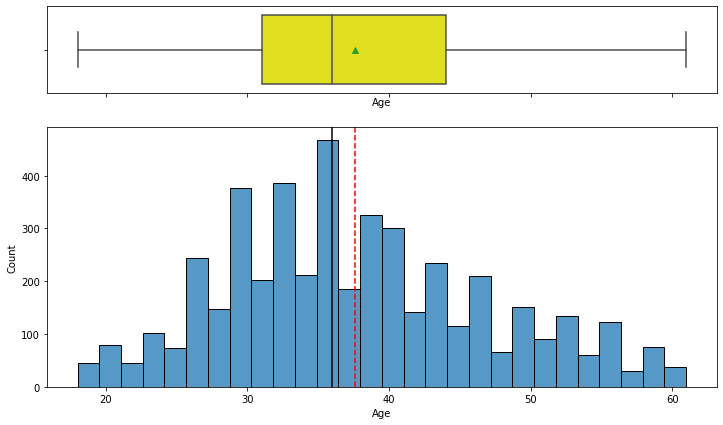

In [19]:
histogram_boxplot(data, 'Age')

- Age has a fairly uniform distribution, with just a slight right skew. 
- The mean age is 37 and the median age is 36.

#City Tier

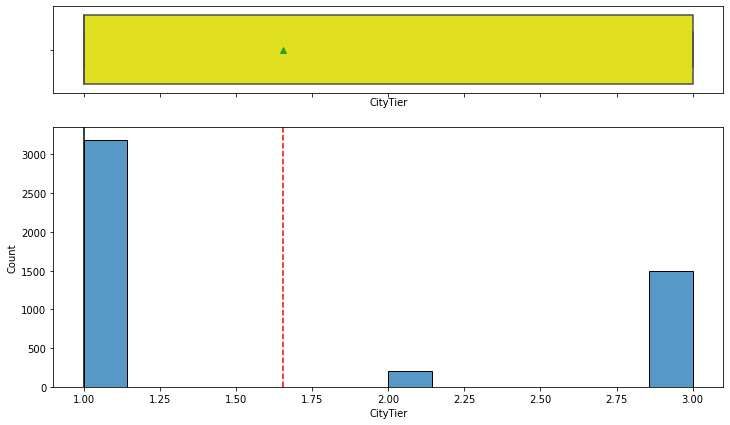

In [20]:
histogram_boxplot(data, 'CityTier')

- There are 3 city tiers with the median being tier 1 which is the highest tier in the ranking system as far as representing larger more popular city destinations.

#Number of Person Visiting

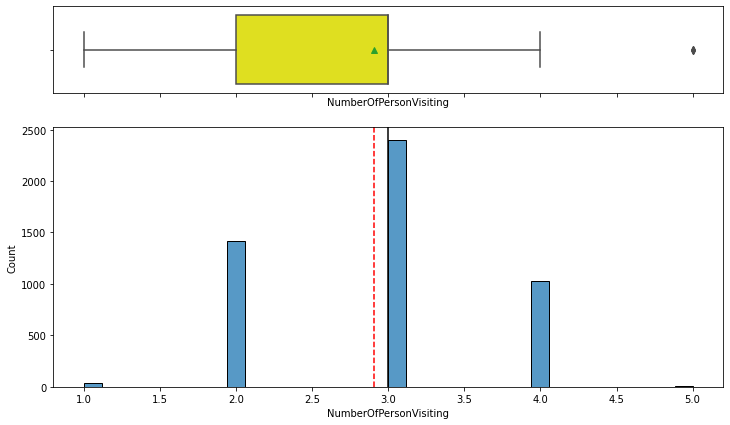

In [21]:
histogram_boxplot(data, 'NumberOfPersonVisiting')

- Most trip packages are purchased by customers with a group of 3.

#Preferred Property Star

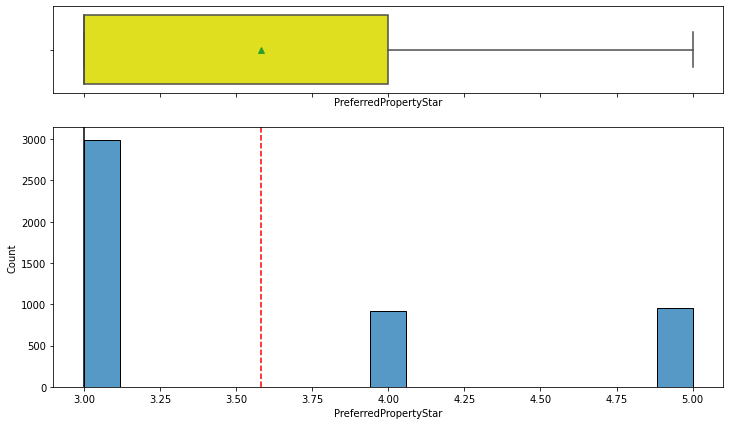

In [22]:
histogram_boxplot(data, 'PreferredPropertyStar')

- 3 star property rating is the most common star rating for customers.

#Number of Trips

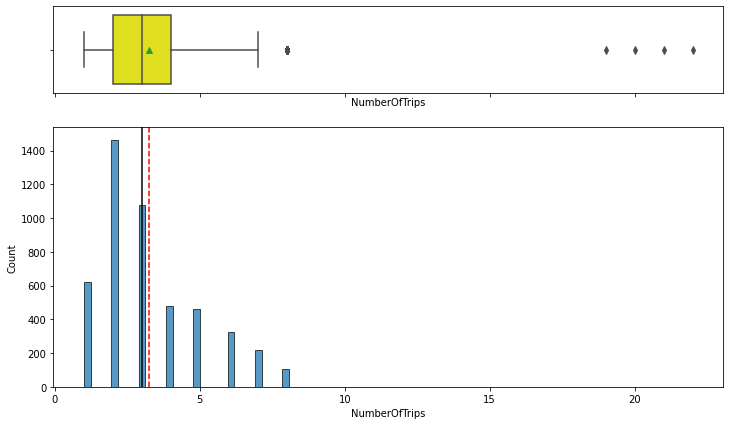

In [23]:
histogram_boxplot(data, 'NumberOfTrips')

- Number of Trips is right skewed with 2 being most common with mean and median being about 3 trips.
- There are several outliers out to the far right. We saw the max number of trips was 22 so we were expecting to see this.

#Passport

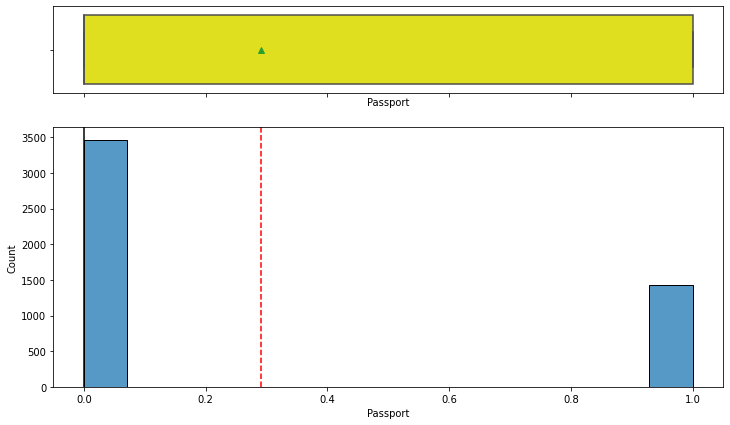

In [24]:
histogram_boxplot(data, 'Passport')

- Passport is a yes or no category and it seems there are more customers who do not have a passport.

#Own Car

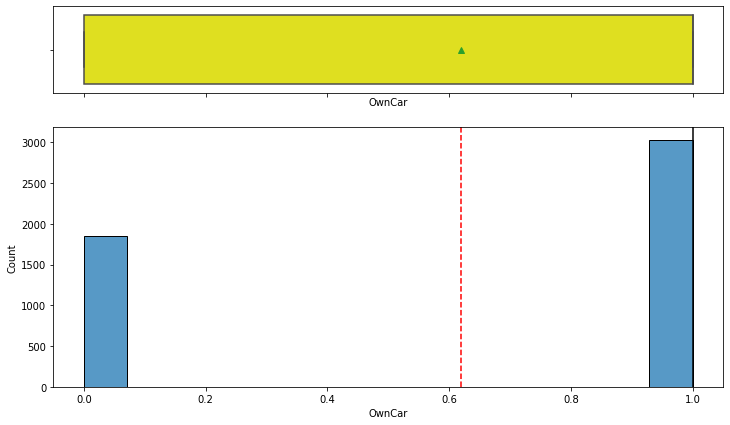

In [25]:
histogram_boxplot(data, 'OwnCar')

- Owning a car is a yes or no column in which the majority of customers do own a car.

#Number of Children Visiting

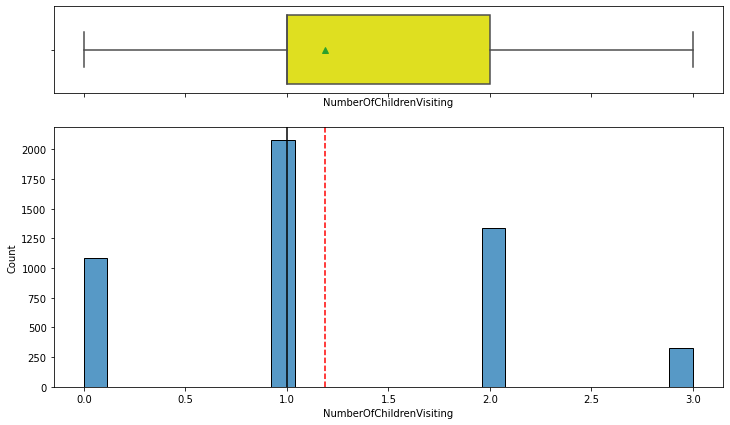

In [26]:
histogram_boxplot(data, 'NumberOfChildrenVisiting')

- Majority of customers have 1 kid accompyning them on their trip which makes sense as a group of 3 was the most common for customers. So we are most likely looking a couples with 1 child being the majority of customers.

#Monthly Income

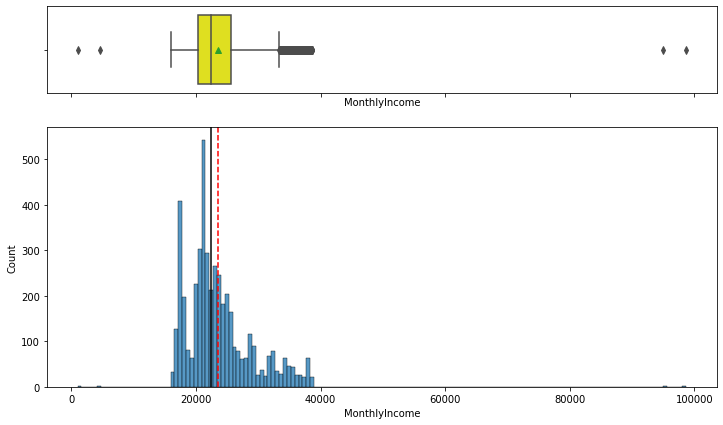

In [27]:
histogram_boxplot(data, 'MonthlyIncome')

- Nearly all customers are in the range of 17,000 to 39,000 for thier monthly income, but there are some outliers outside of this range in both directions.

#Pitch Satisfaction Score

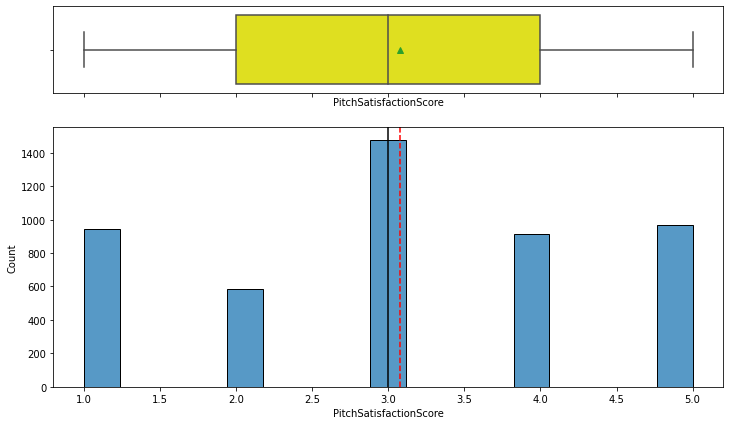

In [28]:
histogram_boxplot(data, 'PitchSatisfactionScore')

- 3 is the most common pitch satisfactioin score, which makes sense as it is the middle value on the scale of 1 to 5.

#Number of Followups

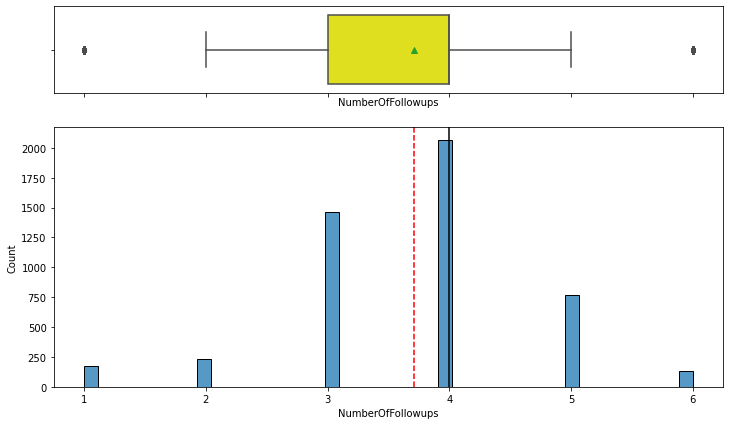

In [29]:
histogram_boxplot(data, 'NumberOfFollowups')

- 4 is the most common number of follow ups amongst customers.
- There are some outliers on both the high and low ends of this column.

#Duration of Pitch

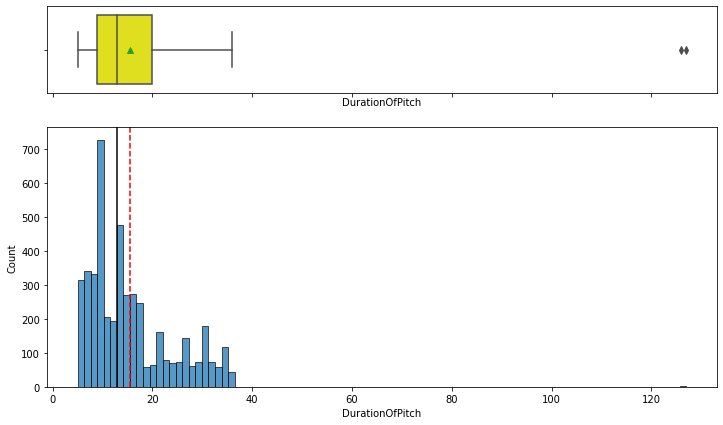

In [30]:
histogram_boxplot(data, 'DurationOfPitch')

- Most pitches are betweenn 5 and 38 minutes minutes but there are some outliers to right which we expected to see as the max pitch duration we saw earlier was 127 minutes.

In [31]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
      plt.figure(figsize=(count + 1, 5))
    else:
      plt.figure(figsize=(n+1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#Type of Contact

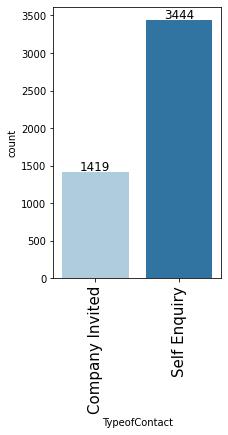

In [32]:
labeled_barplot(data, 'TypeofContact')

- Majority of customers make inquiries themselves.

#Occupation

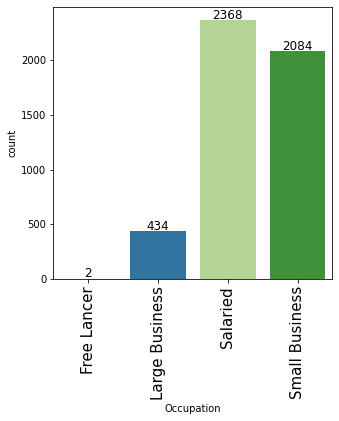

In [33]:
labeled_barplot(data, 'Occupation')

- Majority of customers are salaried and small business is the 2nd largest group.
- There are only 2 free lancer customers.

#Gender

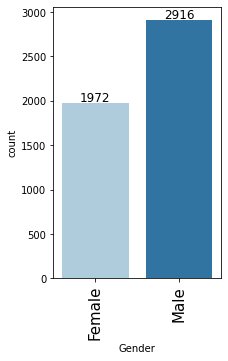

In [34]:
labeled_barplot(data, 'Gender')

- There are more Male customers than there are Female customers.

#Marital Status

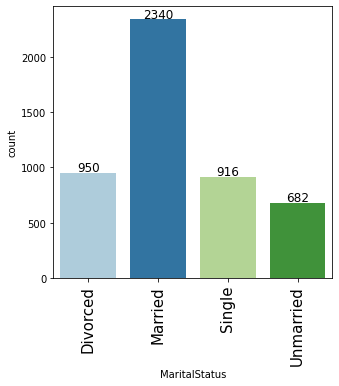

In [35]:
labeled_barplot(data, 'MaritalStatus')

- Majority of customers are married.

#Designation

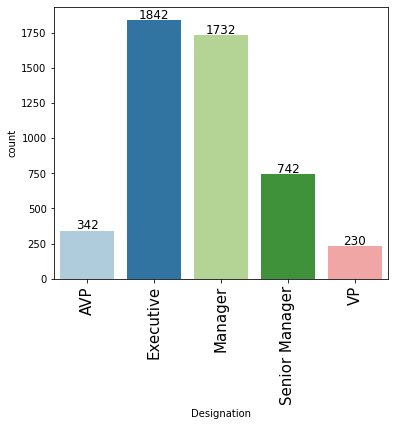

In [36]:
labeled_barplot(data, 'Designation')

- Executive category has the highest customers followed closey by manager.

#Product Pitched

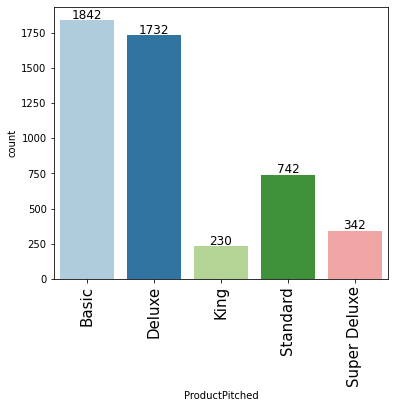

In [37]:
labeled_barplot(data, 'ProductPitched')

- Basic package is the top choice of customers followed closedly by the Deluxe package.

#Bivariate Analysis

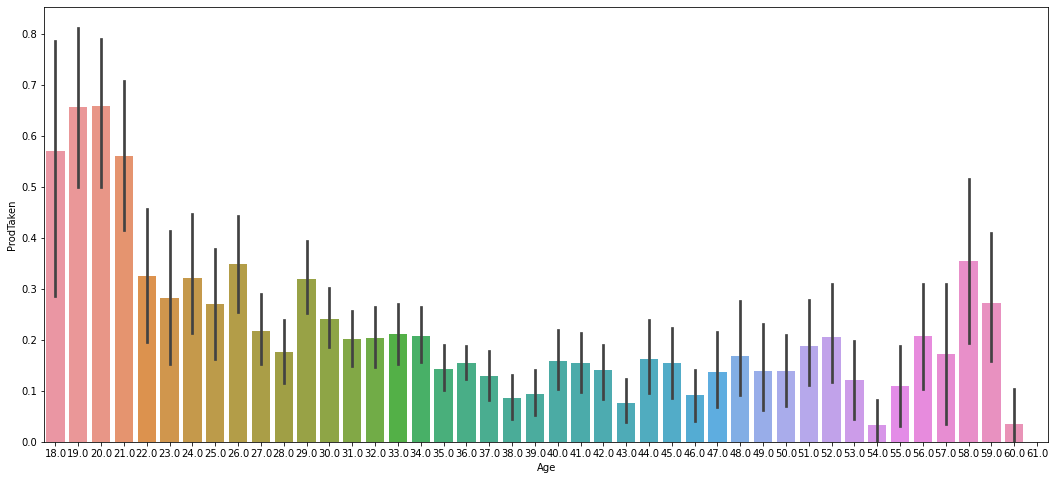

In [120]:
plt.figure(figsize=(18,8))
sns.barplot(data=data, x='Age', y='ProdTaken')
plt.show()

- Younger Ages 18 - 21 are more likely to purchase a tourism package.

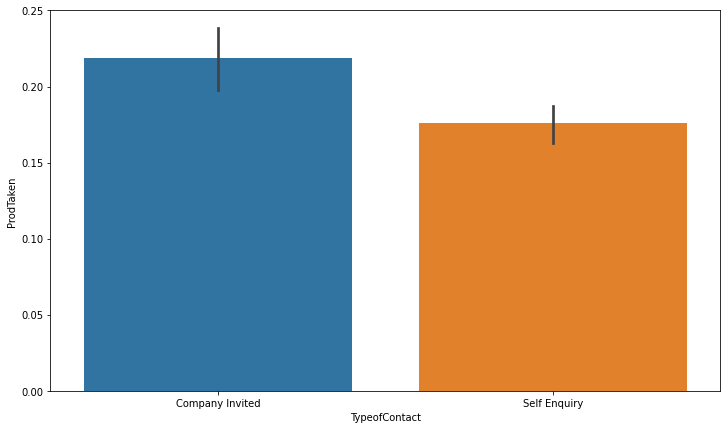

In [122]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='TypeofContact', y='ProdTaken')
plt.show()

- Those customers invited by the company to hear a pitch were more likely to purchase a package. The difference is not very significant though.

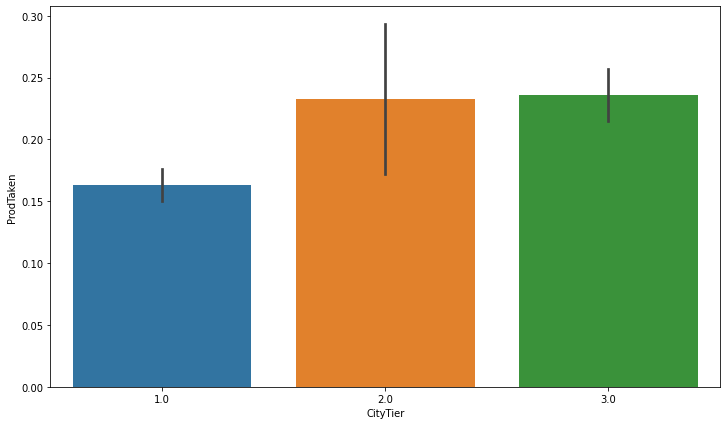

In [124]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='CityTier', y='ProdTaken')
plt.show()

- Tourism packages for tier 2 and tier 3 cities were more likely to be purchase at even rates.

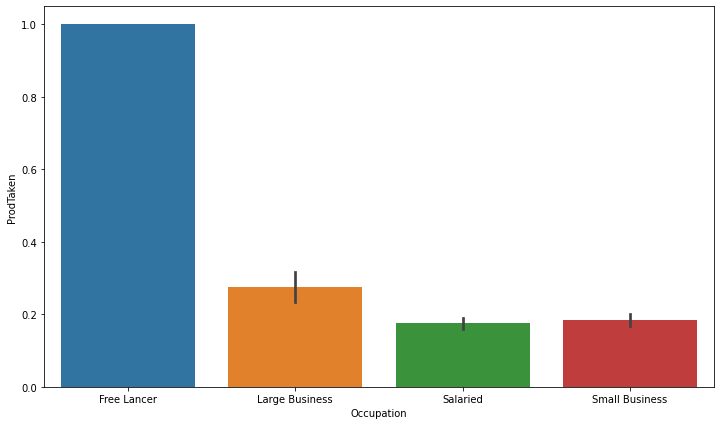

In [125]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='Occupation', y='ProdTaken')
plt.show()

- Free lancers were 100% likely to purchase a tourism package, but there were only 2 free lancers in all of the data so this statistic is not as telling as it seems.
- Large business was the next most likely to purchase a package but the difference vs. salaried and small business is not very large.

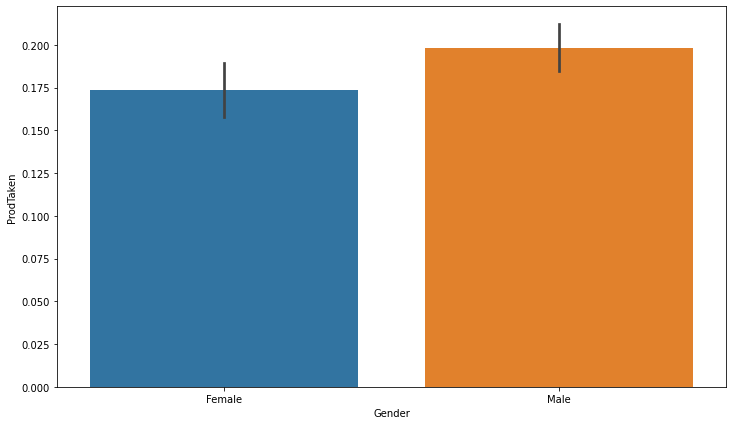

In [126]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='Gender', y='ProdTaken')
plt.show()

- Males were more likely to purchase a package, but there were also more males in the data so this was expected.

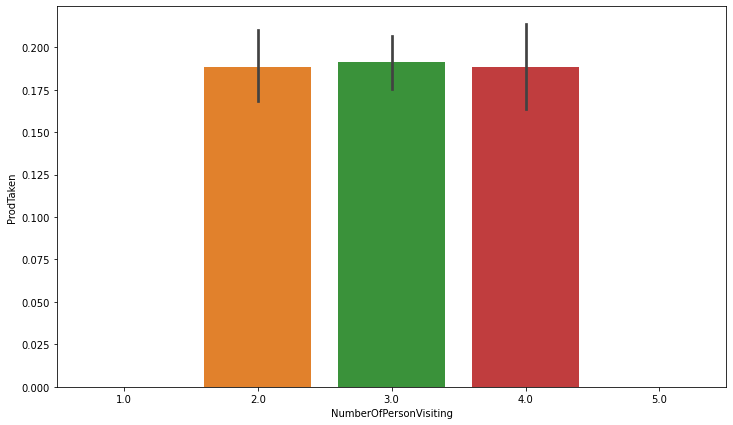

In [127]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='NumberOfPersonVisiting', y='ProdTaken')
plt.show()

- 3 person groups were most likely to purchase but only a fraction more than 2 and 4 person groups.

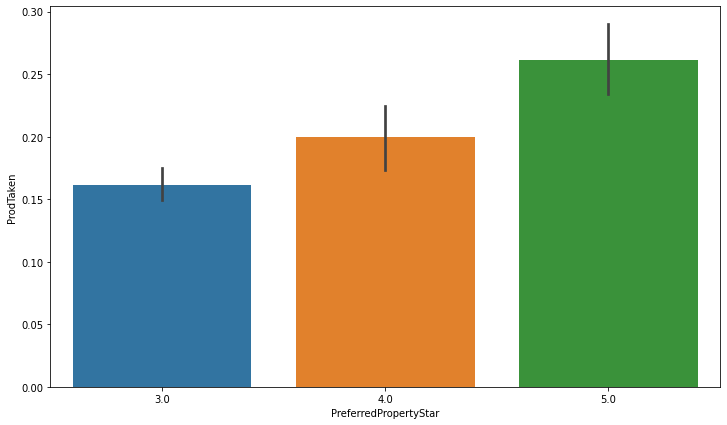

In [128]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='PreferredPropertyStar', y='ProdTaken')
plt.show()

- 5 start property packages were most likely to be purchased.

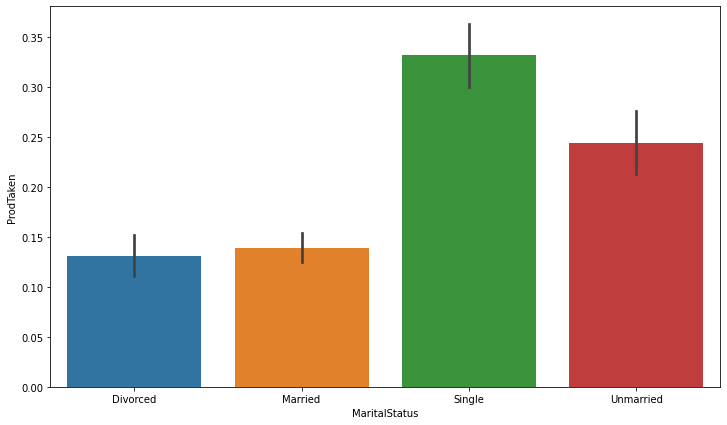

In [129]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='MaritalStatus', y='ProdTaken')
plt.show()

- Single people were most likely to purchase a package.

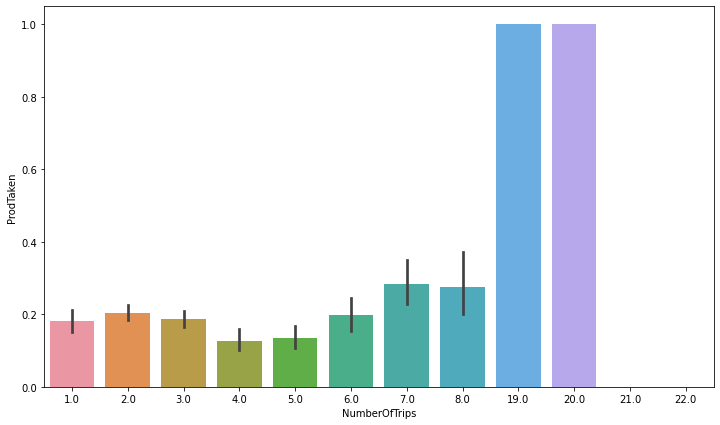

In [130]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='NumberOfTrips', y='ProdTaken')
plt.show()

- People who have taken 19 or 20 trips were most likely to purchase a package. This makes sense as those who have taken more trips in the past are more likely to take more trips.

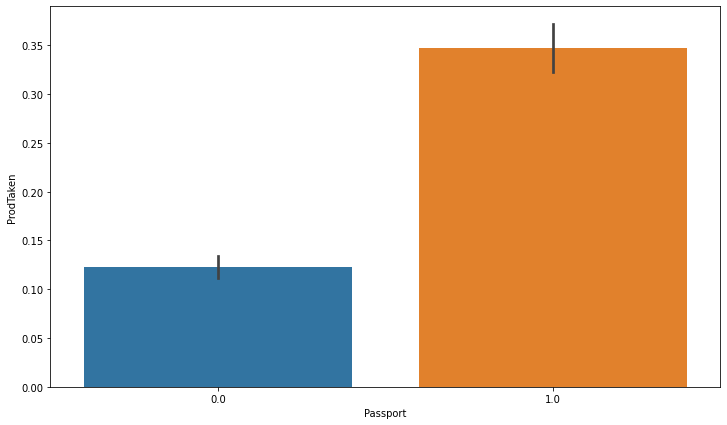

In [131]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='Passport', y='ProdTaken')
plt.show()

- People who have a passport are more likely to purchase a package.

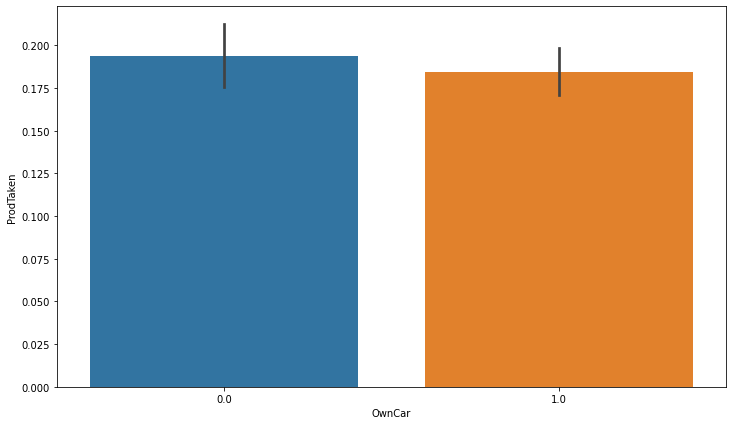

In [132]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='OwnCar', y='ProdTaken')
plt.show()

- Those who do not own a car were more likely to purchase a package, but only at slightly higher rate than those who do own a car.

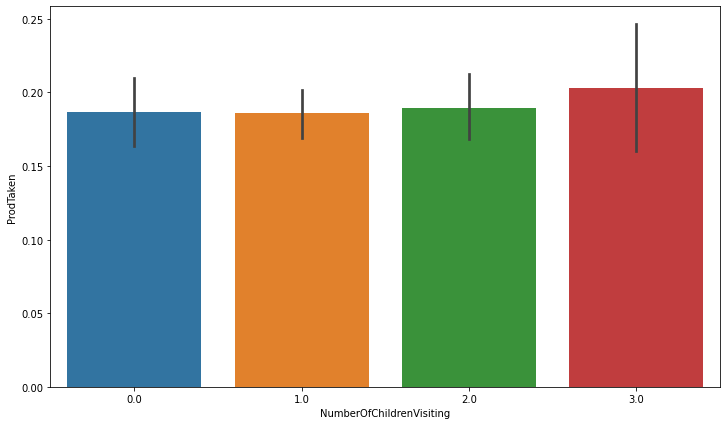

In [134]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='NumberOfChildrenVisiting', y='ProdTaken')
plt.show()

- Those with 3 children visiting visiting were more likely to purchase a package, but only at a slightly higher rate than those with 0 - 2 kids.

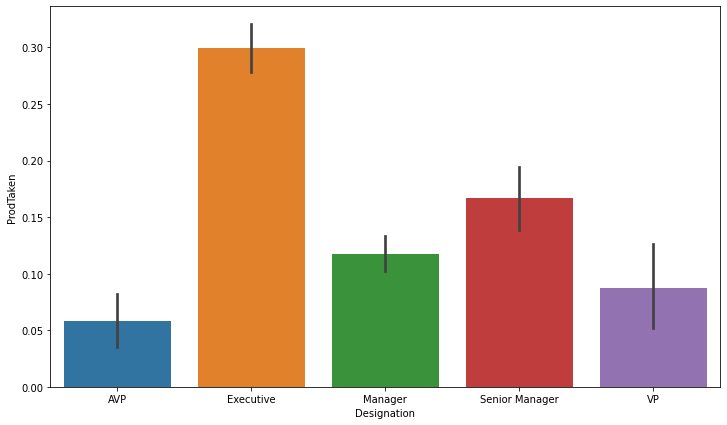

In [135]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='Designation', y='ProdTaken')
plt.show()

- Executives were most likely to purchase a package.

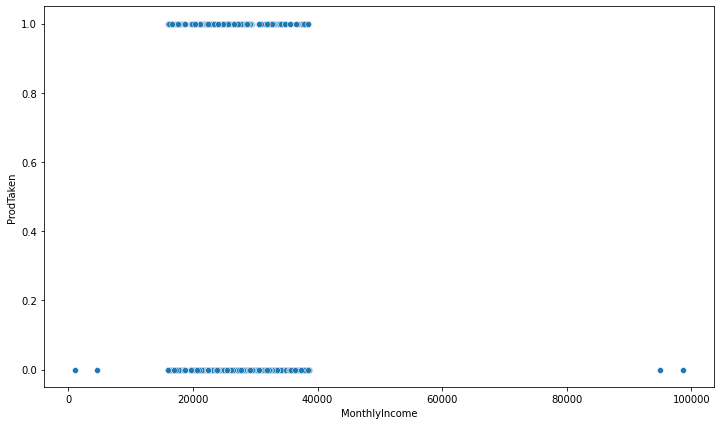

In [143]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=data, x='MonthlyIncome', y='ProdTaken')
plt.show()

- All those who purchased packages were in the range of 18,000 - 40,000 monthly income.

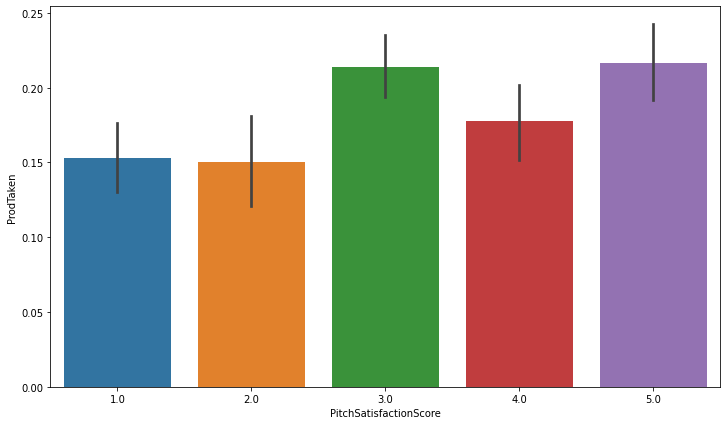

In [144]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='PitchSatisfactionScore', y='ProdTaken')
plt.show()

- Those with satisfaction scores of 3 and 5 were most likely to purchase a package.

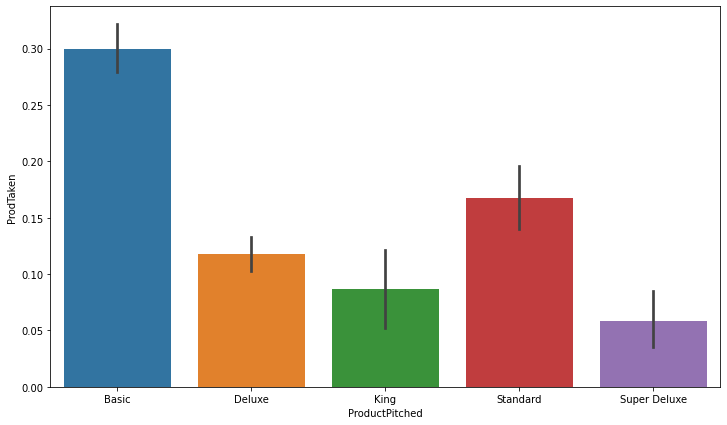

In [145]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='ProductPitched', y='ProdTaken')
plt.show()

- Pitching the basic package was significantly more likely to result in a sale.

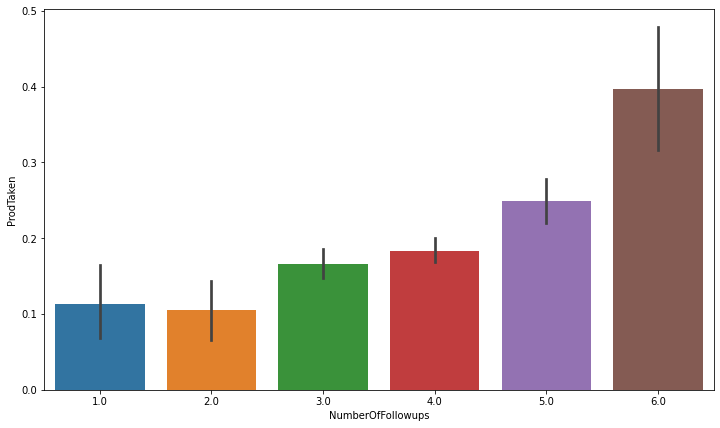

In [146]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='NumberOfFollowups', y='ProdTaken')
plt.show()

- 6 follow ups were most likely to result in a sale.

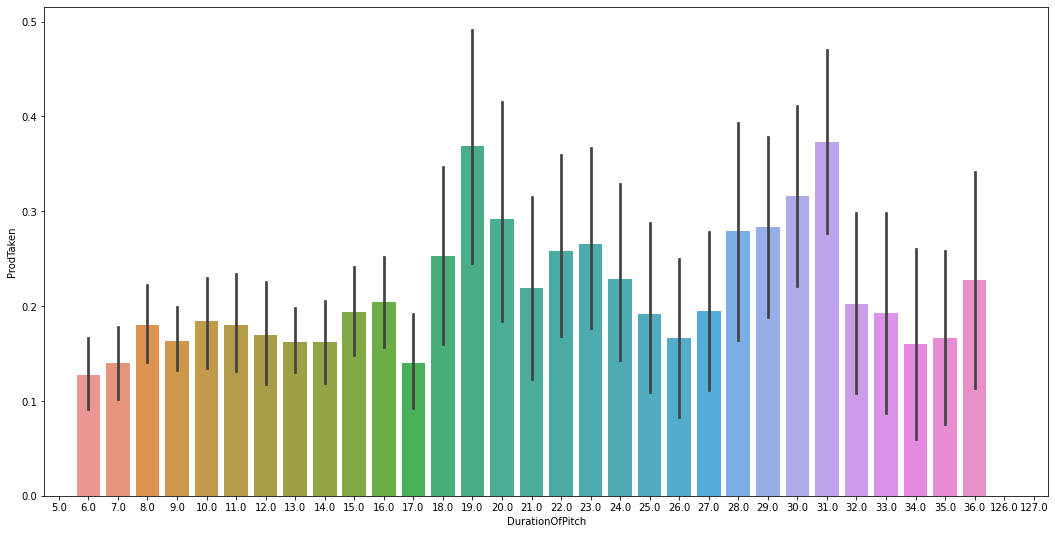

In [148]:
plt.figure(figsize=(18,9))
sns.barplot(data=data, x='DurationOfPitch', y='ProdTaken')
plt.show()

- Pitches of 19 and 31 minutes were most likely to result in a sale.

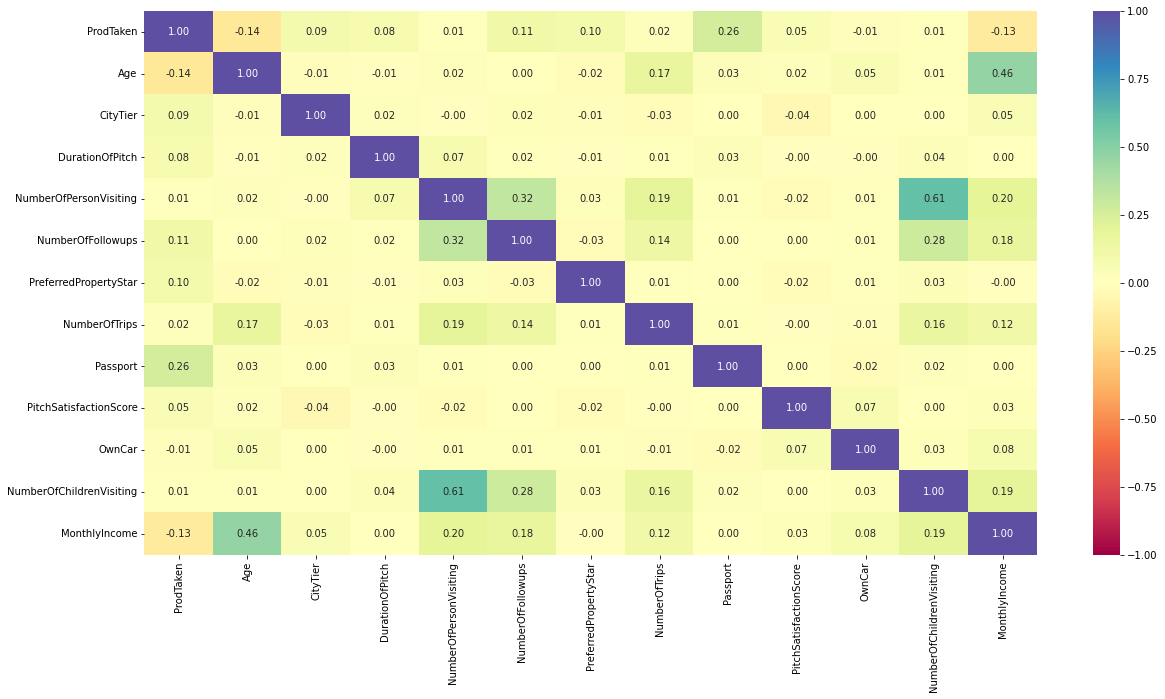

In [133]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

- There does not appear to be any strong correlations between variables
- The only correlation above 0.50 is Number of visiting vs. Number of children visiting whith a 0.61 correlation. This makes sense though as it appears a lot of customers have families and with a larger number of people visiting there is a larger chance that some of those people will be children
- There is a 0.46 correlation between Age and Monthly Income which makes sense as the older someone is they will often see an increase in income that comes with being older and having more experience

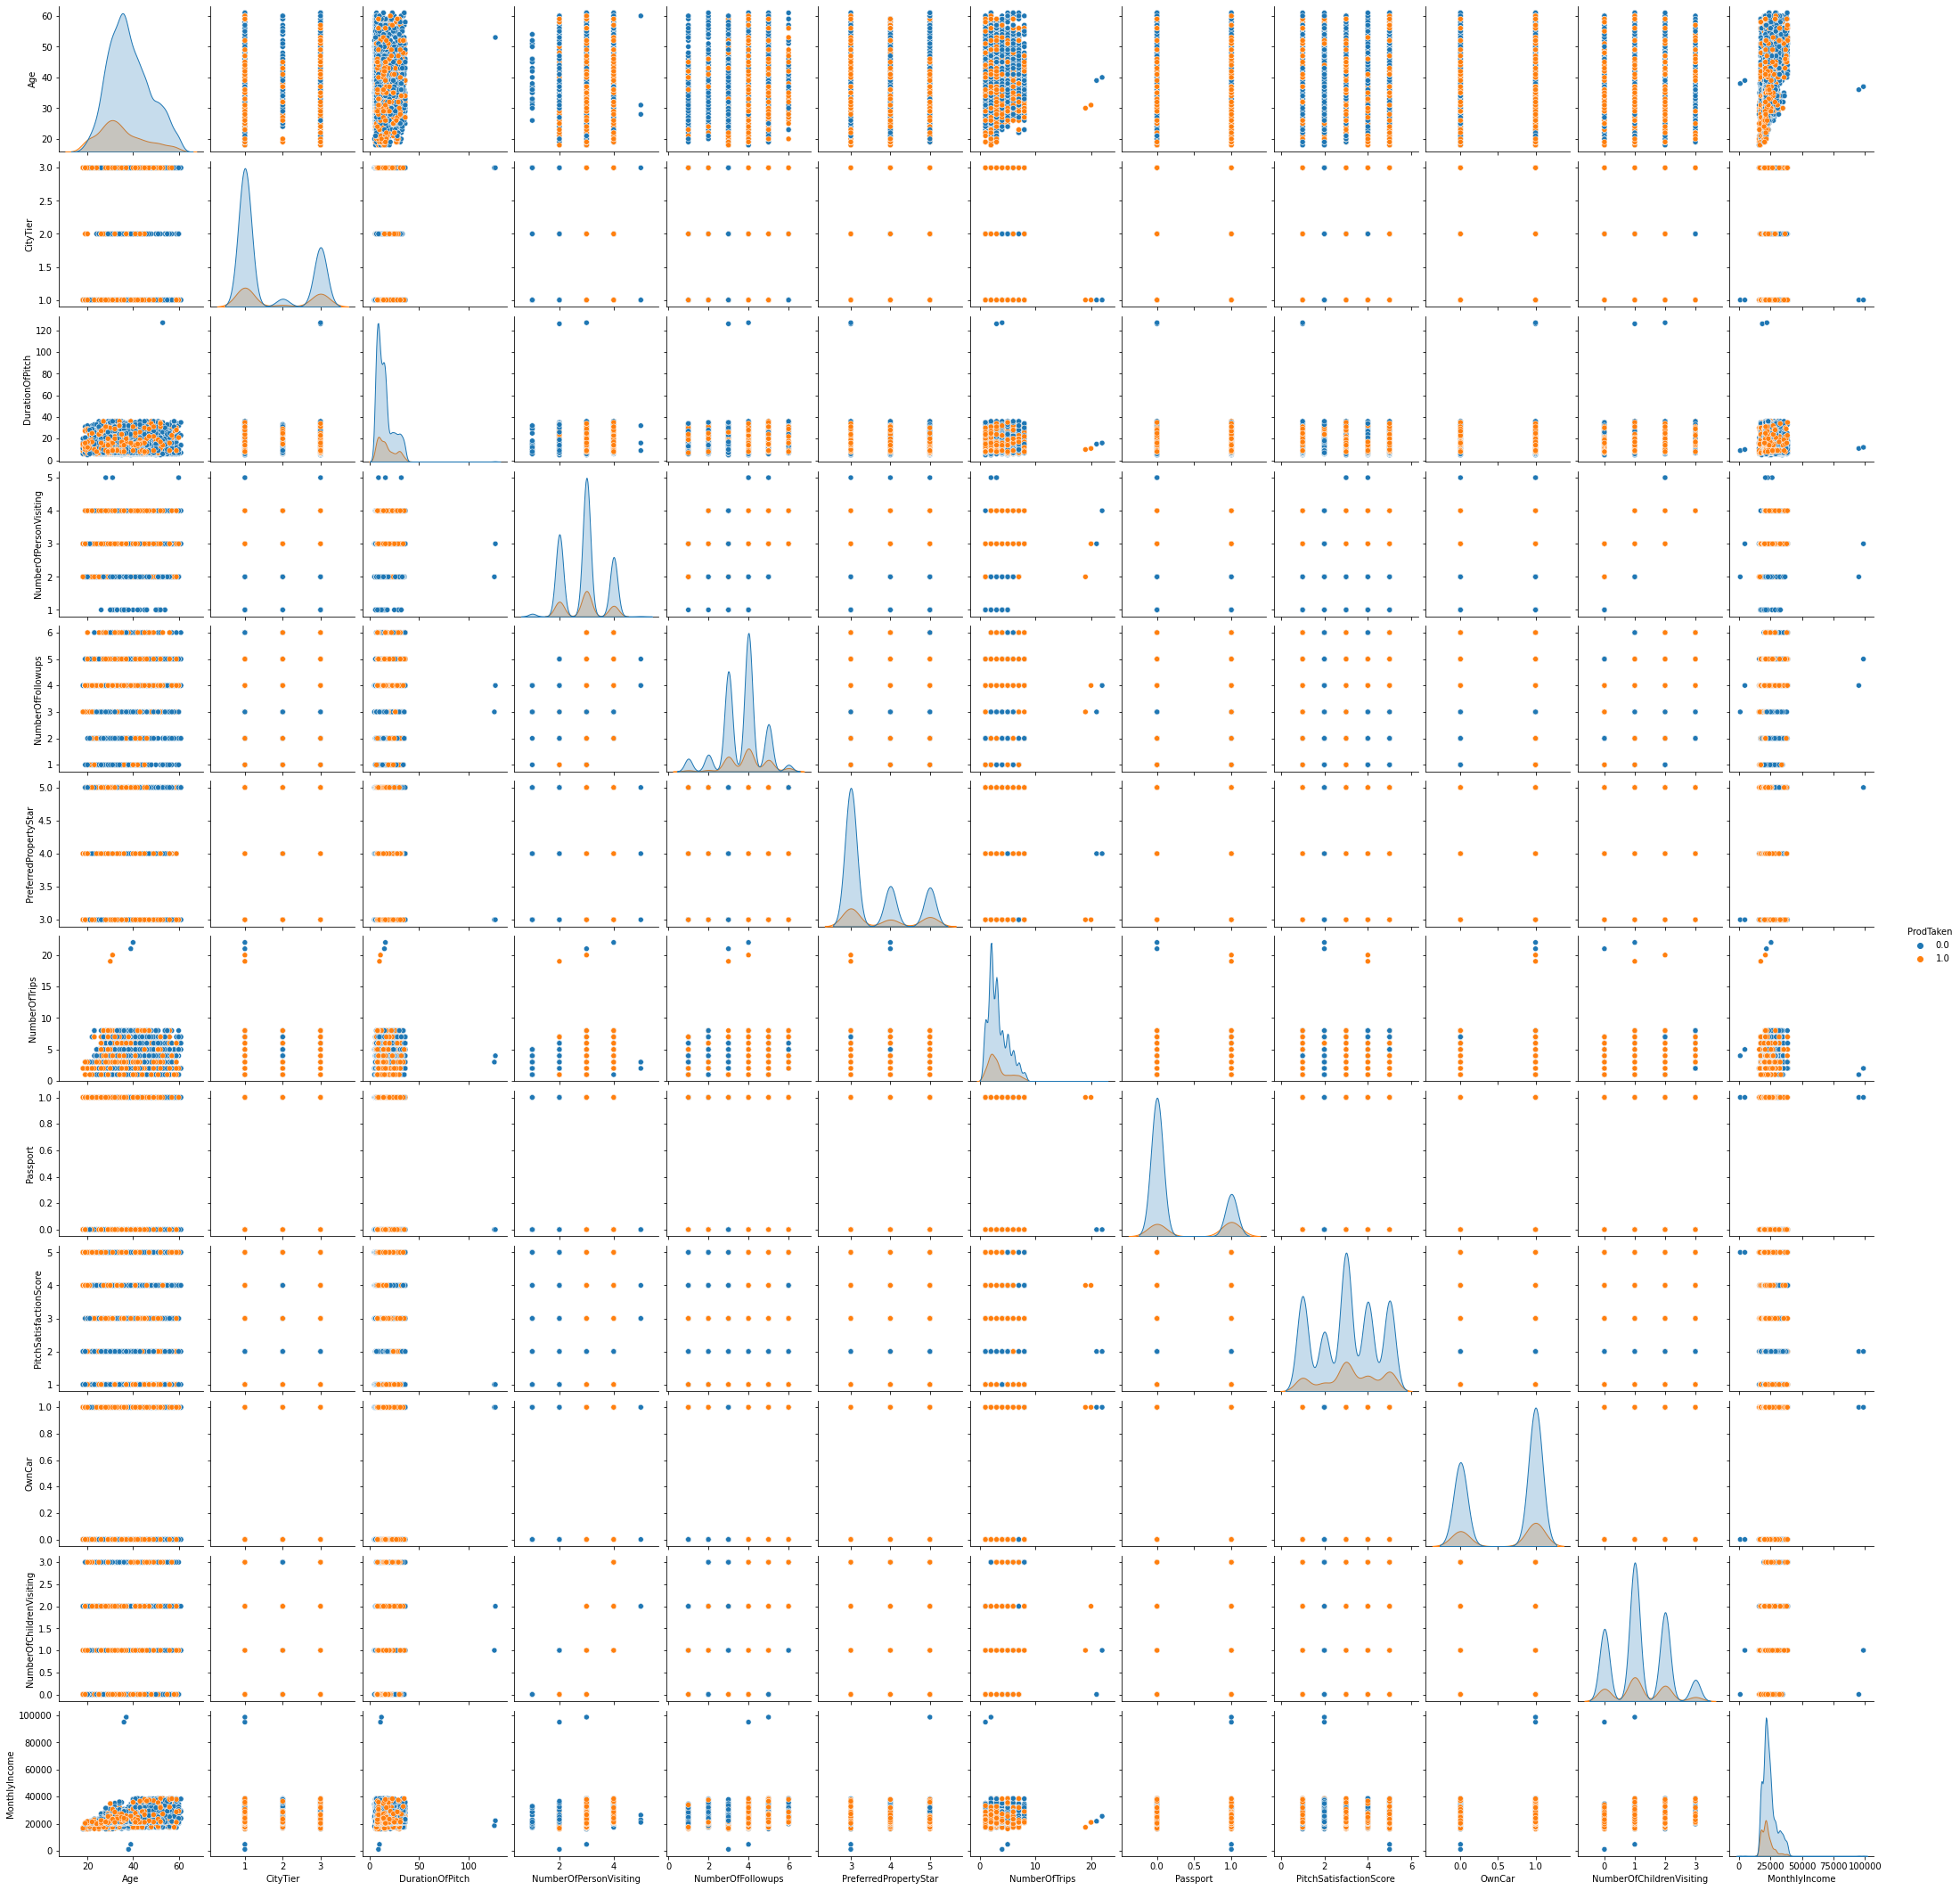

In [39]:
sns.pairplot(data, hue='ProdTaken')
plt.show()

- The only place where it looks like there is some clear correlation is between the number of people visitng with respect to age. There seems to be an even distribution across different ages but there is a visible increase in whether or not a customer purchased a package as the number of people visiting increases.

#Data Cleaning

In [40]:
# missing value imputation for Age
data['Age'] = data['Age'].replace(np.nan, data['Age'].median())

In [41]:
data['Age'].isnull().sum()

0

In [42]:
# missing value imputation for Preferred Property Star
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].replace(np.nan, data['PreferredPropertyStar'].median())

In [43]:
data['PreferredPropertyStar'].isnull().sum()

0

In [44]:
# imputation for Number of trips
data['NumberOfTrips'] = data['NumberOfTrips'].replace(np.nan, data['NumberOfTrips'].median())

In [45]:
data['NumberOfTrips'].isnull().sum()

0

In [46]:
# imputation for Number of children visiting
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].replace(np.nan, data['NumberOfChildrenVisiting'].median())

In [47]:
data['NumberOfChildrenVisiting'].isnull().sum()

0

In [48]:
# imputation for monthly income
data['MonthlyIncome'] = data['MonthlyIncome'].replace(np.nan, data['MonthlyIncome'].median())

In [49]:
data['MonthlyIncome'].isnull().sum()

0

In [50]:
# imputation for number of followups
data['NumberOfFollowups'] = data['NumberOfFollowups'].replace(np.nan, data['NumberOfFollowups'].median())

In [51]:
data['NumberOfFollowups'].isnull().sum()

0

In [52]:
# imputation for Duration of Pitch
data['DurationOfPitch'] = data['DurationOfPitch'].replace(np.nan, data['DurationOfPitch'].median())

In [53]:
data['DurationOfPitch'].isnull().sum()

0

In [54]:
data[['TypeofContact', 'Occupation','Gender','ProductPitched','MaritalStatus', 'Designation']] = data[['TypeofContact', 'Occupation','Gender','ProductPitched','MaritalStatus', 'Designation']].astype('category')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   float64 
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   float64 
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   float64 
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   float6

Replace missing values for Type of Contact

In [56]:
missing_col = ['TypeofContact']
 
for i in missing_col:
  data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].fillna('Self Enquiry')
 
print("count of NULL values after imputation\n")
data.isnull().sum()

count of NULL values after imputation



ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#Summary of EDA

- Dependent variable is 'ProdTaken' which represents whether or not the customer purchased a tourism package.
- Avg. age for customers is 37, but those 18 - 21 were most likely to purchase a package.
- Cusomers have an average of 3 people in their group for taking the trip but only slightly more likely than 4 or 5 person groups.
- All those customers who purchased a package were in the monthly income range of 18,000 to 40,000.
- Tier 1 cities were most pitched, but tier 2 and cities were more likely to sell a tourism package.
- Most customers do not have passports but do own cars, but customers who had a passport and did not own a car were more likely to purchase a package.
- Males were more likely to purchase a package, which should be expected since there were more male customers.
- Pitches are 15 and 1/2 minutes on average, but pitches of 19 and 31 minutes were more likely to result in a sale. 
- The majority of customers have 4 followups, but 6 followups resulted in more sales.
- More customers are married vs. any of the other marital statuses, but single customers purchased more packages.
- Customers are primarily sourced via self enquiry as opposed to company invited, but company invited customers purchased more packages.
- For occupation most customers are either salaried or small business. All free lancer customers purchased purchased a package, but there were only 2 so this statistic is not very telling. Large business customers tend to buy more packages.
- Top designations are for executives and managers, but Executives were much more likely to purchase a package.
- The basic and deluxe packages are most popular as opposed to the higher tier packages, but basic packages definitely resulted in more sales.
- 5 star properties sold the most.
- Customers who have taken 19 or 20 trips were significantly more likely to purchase a package.
- Correlation amongst variables is not very strong.


###Data Cleaning
- There were missing values for 8 of the variables.
- All missing values were imputed using the median for their respective variables.
- We dropped the customer ID column as it was not important for building our model.

#Splitting The Dataset

In [57]:
X = data.drop(['ProdTaken'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['ProdTaken']

In [58]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(3421, 28) (1467, 28)


- There are 3,421 entries in our training set and 1,467 entries in our test set.

#Model Building

###Model evaluation criterion
The model can make wrong predictions as:
1. Predicting a customer will purchase a tourism package when they won't
2. Predicting a custoer won't purchase a tourism package when they would have


###Which case is more important?
1. If the model predicts a customer will purchase a tourism package when they actually will not purchase one. This is more important as the company would be putting time and money into advertising, creating a pitch, and following up on a customer who is not going to end up making a purchase. In this case the company is not only losing out on the sale, but it is also costing them resources for which they will see no return.


###Which metric to optimize?
- We would want Precision to be maximized, the greater the Precision the higher the chances of not falsely predicting a customer will purchase a tourism package when they won't actually purchase one. Maximized Precision will give us the greatest reduction in false positives.

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_perf_class_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score


    # creating a dataframe of metrics
    df_metric_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_metric_perf

In [60]:
def conf_mat_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#Decision Tree Model

In [61]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [62]:
dtree_model_train_perf=model_perf_class_sklearn(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)


Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [63]:
dtree_model_test_perf=model_perf_class_sklearn(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.877982  0.673913   0.676364  0.675136


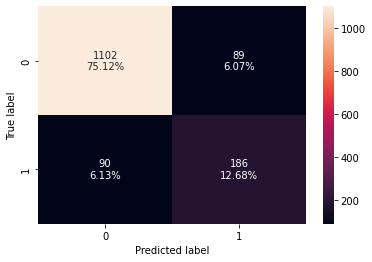

In [64]:
conf_mat_sklearn(dtree, X_test, y_test)

- The decision tree is overfitting on the training data.
- we can try to improve this using hyperparameter tuning.

##Hyperparameter Tuning

In [65]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       random_state=1)

In [66]:
dtree_estimator_model_train_perf = model_perf_class_sklearn(dtree_estimator, X_train, y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.821397  0.341615   0.540541  0.418649


In [67]:
dtree_estimator_model_test_perf = model_perf_class_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.841172  0.369565    0.63354  0.466819


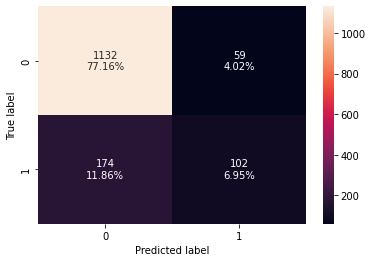

In [68]:
conf_mat_sklearn(dtree_estimator, X_test, y_test)

- The model is no longer overfitting on the training data.
- test performance has fallen though.
- let's try some different models.

#Random Forest Classifier

In [69]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [70]:
rf_estimator_model_train_perf=model_perf_class_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [71]:
rf_estimator_model_test_perf=model_perf_class_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.916155  0.59058   0.942197  0.726058


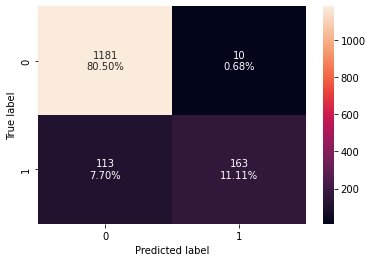

In [72]:
conf_mat_sklearn(rf_estimator, X_test, y_test)

- It looks like there is some overfitting on the training data.
- Test test data shows much higher Precision though.
- Let's try tuning to see if it iproves the performance.

##Hyperparameter Tuning

In [73]:
# Choose classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,55,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=20,
                       max_features='log2', n_estimators=40, oob_score=True,
                       random_state=1)

In [74]:
rf_tuned_model_train_perf=model_perf_class_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [75]:
rf_tuned_model_test_perf=model_perf_class_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.897751  0.474638   0.963235  0.635922


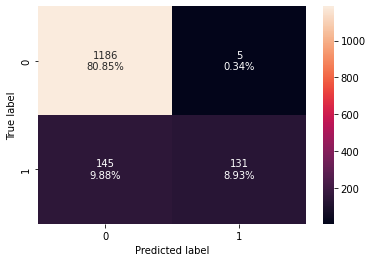

In [76]:
#Creating confusion matrix
conf_mat_sklearn(rf_tuned,X_test,y_test)

- There still seems to be some overfitting on the training data but Precision scored improved even further after tuning.
- Let's see about some other models.

#Bagging Classifier


In [77]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [78]:
bagging_classifier_model_train_perf=model_perf_class_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.995031  0.973602        1.0  0.986625


In [79]:
bagging_classifier_model_test_perf=model_perf_class_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

   Accuracy    Recall  Precision        F1
0   0.91002  0.608696      0.875  0.717949


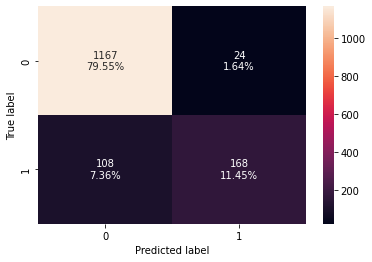

In [80]:
conf_mat_sklearn(bagging_classifier, X_test, y_test)

- Training data is still slightly overfittinh but it is better than the previous models.
- Precision on the test data is lower than Random Forest, but overall test data is performing better.
-  Let's see if tuning can improved this model further.

##Hyperparameter Tuning

In [81]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [82]:
bagging_estimator_tuned_model_train_perf=model_perf_class_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [83]:
bagging_estimator_tuned_model_test_perf=model_perf_class_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.908657  0.550725   0.938272  0.694064


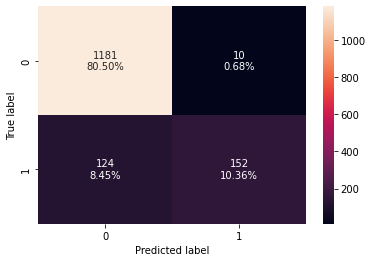

In [84]:
conf_mat_sklearn(bagging_estimator_tuned, X_test, y_test)

- Training data is showing signs of overfitting.
- Precision score improved but overall test performance has fallen.

#AdaBoost Classifier

In [85]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [86]:
ab_classifier_model_train_perf=model_perf_class_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0   0.84449  0.318323   0.687919  0.435244


In [87]:
ab_classifier_model_test_perf=model_perf_class_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

   Accuracy    Recall  Precision    F1
0  0.850034  0.326087   0.725806  0.45


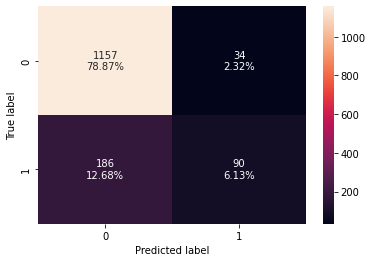

In [88]:
#Creating confusion matrix
conf_mat_sklearn(ab_classifier,X_test,y_test)

- Finally this model is not overfitting on the training data.
- Test performance is showing imrpovement over the training data across all metrics.

##Hyperparameter Tuning

In [89]:
# Choose type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit best algorithm to the data.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [90]:
abc_tuned_model_train_perf=model_perf_class_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)

   Accuracy    Recall  Precision       F1
0  0.817305  0.031056   0.952381  0.06015


In [91]:
abc_tuned_model_test_perf=model_perf_class_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.818678  0.039855   0.916667  0.076389


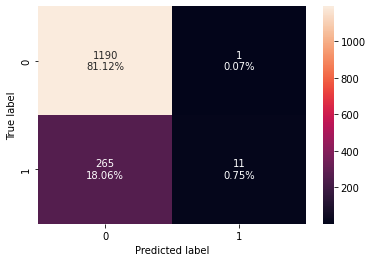

In [92]:
conf_mat_sklearn(abc_tuned, X_test, y_test)

- Precision is a little lower on the test data but overall training and test data have both improved.

#Gradient Boosting Classifier

In [93]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [94]:
gb_classifier_model_train_perf=model_perf_class_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.883075  0.437888    0.88125  0.585062


In [95]:
gb_classifier_model_test_perf=model_perf_class_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.868439  0.402174   0.798561  0.53494


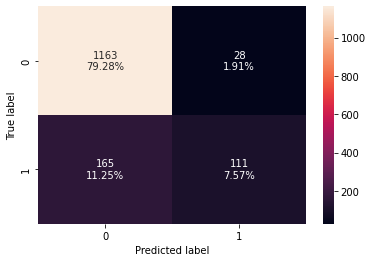

In [96]:
conf_mat_sklearn(gb_classifier, X_test, y_test)

- Test set is lower than the training set by a little.

##Hyperparameter Tuning

In [97]:
# Choose type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [98]:
gbc_tuned_model_train_perf=model_perf_class_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.850336  0.21118   0.971429  0.346939


In [99]:
gbc_tuned_model_test_perf=model_perf_class_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.839809  0.17029   0.886792  0.285714


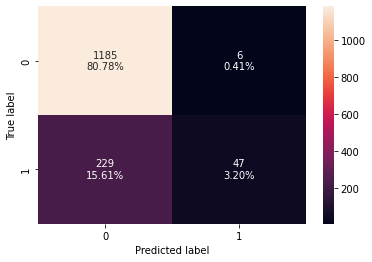

In [100]:
conf_mat_sklearn(gbc_tuned, X_test, y_test)

- Test performance is lower than the training data.

#XGBoost Classifier

In [101]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [102]:
xgb_classifier_model_train_perf=model_perf_class_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.880152  0.419255   0.882353  0.568421


In [103]:
xgb_classifier_model_test_perf=model_perf_class_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.865712  0.365942   0.821138  0.506266


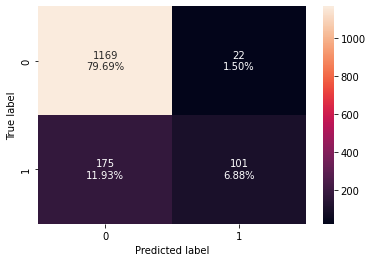

In [104]:
conf_mat_sklearn(xgb_classifier, X_test, y_test)

- Test data is a little worse off than the training data.

##Hyperparameter

In [105]:
# Choose classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Sete clf to the best combination
xgb_tuned = grid_obj.best_estimator_

# Fit best algorithm
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.5, colsample_bytree=0.7,
              eval_metric='logloss', n_estimators=10, random_state=1,
              subsample=0.7)

In [106]:
xgb_tuned_model_train_perf=model_perf_class_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.826074  0.085404   0.901639  0.156028


In [107]:
xgb_tuned_model_test_perf=model_perf_class_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.826858  0.09058   0.892857  0.164474


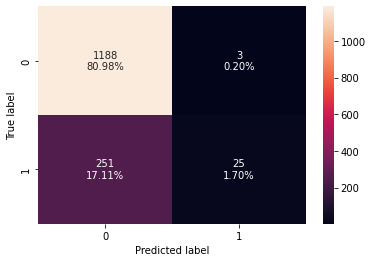

In [108]:
conf_mat_sklearn(xgb_tuned, X_test, y_test)

- Training data is not overfitting but test data isn't great.

#Stacking Classifier

In [109]:
estimators = [('Random Forest', rf_tuned), ('Gradient Boosting', gbc_tuned), ('Decision Tree', dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=20,
                                                       max_features='log2',
                                                       n_estimators=40,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
       

In [110]:
stacking_classifier_model_train_perf=model_perf_class_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999708     1.0    0.99845  0.999224


In [111]:
stacking_classifier_model_test_perf=model_perf_class_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0   0.92229  0.67029   0.889423  0.764463


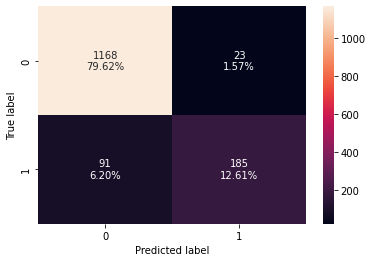

In [112]:
conf_mat_sklearn(stacking_classifier, X_test, y_test)

- Data seems to be overfitting a little on the training data.
- Test data is lower than training data.

#Comparing all models

In [113]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.821397,1.0,1.0,0.995031,1.0,0.844490,0.817305,0.883075,0.850336,0.880152,0.826074,0.999708
Recall,1.0,0.341615,1.0,1.0,0.973602,1.0,0.318323,0.031056,0.437888,0.211180,0.419255,0.085404,1.000000
Precision,1.0,0.540541,1.0,1.0,1.000000,1.0,0.687919,0.952381,0.881250,0.971429,0.882353,0.901639,0.998450
F1,1.0,0.418649,1.0,1.0,0.986625,1.0,0.435244,0.060150,0.585062,0.346939,0.568421,0.156028,0.999224


In [114]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.877982,0.841172,0.916155,0.897751,0.910020,0.908657,0.850034,0.818678,0.868439,0.839809,0.865712,0.826858,0.922290
Recall,0.673913,0.369565,0.590580,0.474638,0.608696,0.550725,0.326087,0.039855,0.402174,0.170290,0.365942,0.090580,0.670290
Precision,0.676364,0.633540,0.942197,0.963235,0.875000,0.938272,0.725806,0.916667,0.798561,0.886792,0.821138,0.892857,0.889423
F1,0.675136,0.466819,0.726058,0.635922,0.717949,0.694064,0.450000,0.076389,0.534940,0.285714,0.506266,0.164474,0.764463


- Random Forest Tuned is has the highest Precision score but the training data for the Tuned Random Forest is overfitting.
- Adaboost Classifier Tuned has a pretty high precision and accuracy and the training data is not overfitting but the recall and f1 score are very low.
- Gradient Boost Classifier has a good generalized training and test data without overfitting but the precision is not as high as some of the others. Overall though it is the best option without overfitting.



#Feature importance of Gradient Boost Classifier

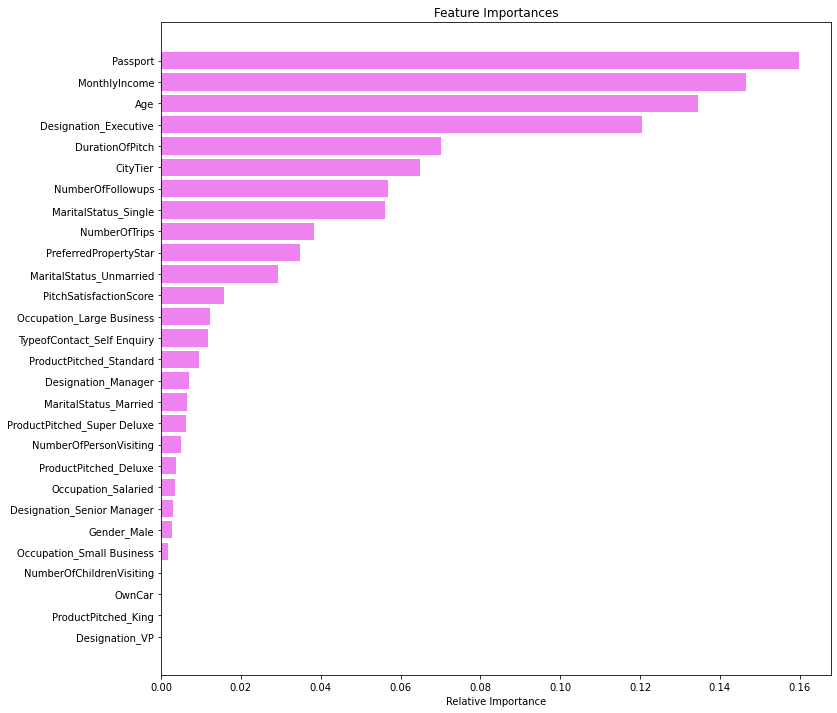

In [115]:

feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Whether or not a customer has a Passport is the most important feature.
- Monthly Income and Age are the next two most most important features.
- Whether or not a customer is Designated an Executive is the 4th most important feature but it is still significantly more important than the rest of the features.

#Conclusion:
- Based on our analysis, the customers who are most likely to purchase a tourism package are Executives with a Passport who are 18 - 21, and have a montly income between 18,000 - 40,000.
- Also important determining factors is the Duration of the Pitch, The Number of Followups, The City Tier, and a Marital Status of Single are also more important features.
 


#Reccomendations
- Visit With Us should focus on creating a customer profile for those most likely to purchase a tourism package in order to make the most efficient use of their marketing budget for their new Wellness Tourism Package.
- The customer profile needs to focus on the 8 most importan features we found according to the Gradient Boost Classifier model.
- They need to focus on Executives with passports who are single and are ages 18 - 21 as well as making between 18,000 - 40,000 in monthly income.
- The company also should focus on pitching primarily Tier 2 and 3 cities.
- The company needs to focus on the duration of the pitch being around the 19 or 31 minutes as well as trying to complete 6 followups with all of the customers they target meeting all or a majority of the above outlined criteria.
- As long as Visit With Us focuses on targeting customers that meet these criterion as well as tailoring the their pitch duration, and number of followups, with their new Wellness Tourism package to Tier 2 and 3 cities then they will have a much higher chance of getting a good return on thier marketing budget investment.